In [104]:
#Import important libs
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
from datetime import date, timedelta as td, datetime as dt
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
#reading in the first dataset
df1 = pd.read_csv("https://raw.githubusercontent.com/eugeniousone/ETL-Project/master/athlete_events.csv")
df1[:3]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [4]:
#reading in the second dataset
df2 = pd.read_csv("https://raw.githubusercontent.com/eugeniousone/ETL-Project/master/noc_regions.csv")
df1[:3]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [5]:
#merging the dataset
df = df1.merge(df2, how = 'left', on = 'NOC')
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.00,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.00,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

In [12]:
df.isnull().sum()

id             0
name           0
sex            0
age            0
height     60171
weight     62875
team           0
noc            0
games          0
year           0
season         0
city           0
sport          0
event          0
medal     231333
region       370
notes     266077
dtype: int64

In [10]:
#set the columns to lower caps
df.columns= df.columns.str.lower()
df.columns

Index(['id', 'name', 'sex', 'age', 'height', 'weight', 'team', 'noc', 'games',
       'year', 'season', 'city', 'sport', 'event', 'medal', 'region', 'notes'],
      dtype='object')

In [22]:
#let's fill blanks
df['height'].fillna(df['height'].mean(),inplace = True)
df['weight'].fillna(df['weight'].mean(),inplace = True)
df['medal'].fillna(0,inplace = True)
df['region'].fillna('n/a',inplace = True)

In [54]:
#add a flag to count total medals won
medal_fl = []
for each in df.medal:
    if not each:
        medal_fl.append(0)
    else:
         medal_fl.append(1)
            
df['medal_fl'] = medal_fl

In [55]:
df.isnull().sum()

id               0
name             0
sex              0
age              0
height           0
weight           0
team             0
noc              0
games            0
year             0
season           0
city             0
sport            0
event            0
medal            0
region           0
notes       266077
medal_fl         0
dtype: int64

In [144]:
#Querying top 10 participating countries
top_10 = df['region'].value_counts(ascending = False).reset_index()[:10]
top_10.columns = ['country', 'total_participations']
top_10

,country,total_participations
0,USA,18853
1,Germany,15883
2,France,12758
3,UK,12256
4,Russia,11692
5,Italy,10715
6,Canada,9734
7,Japan,8444
8,Sweden,8339
9,Australia,7724


Text(0.5, 1.0, 'Top 10 paticipating Countries')

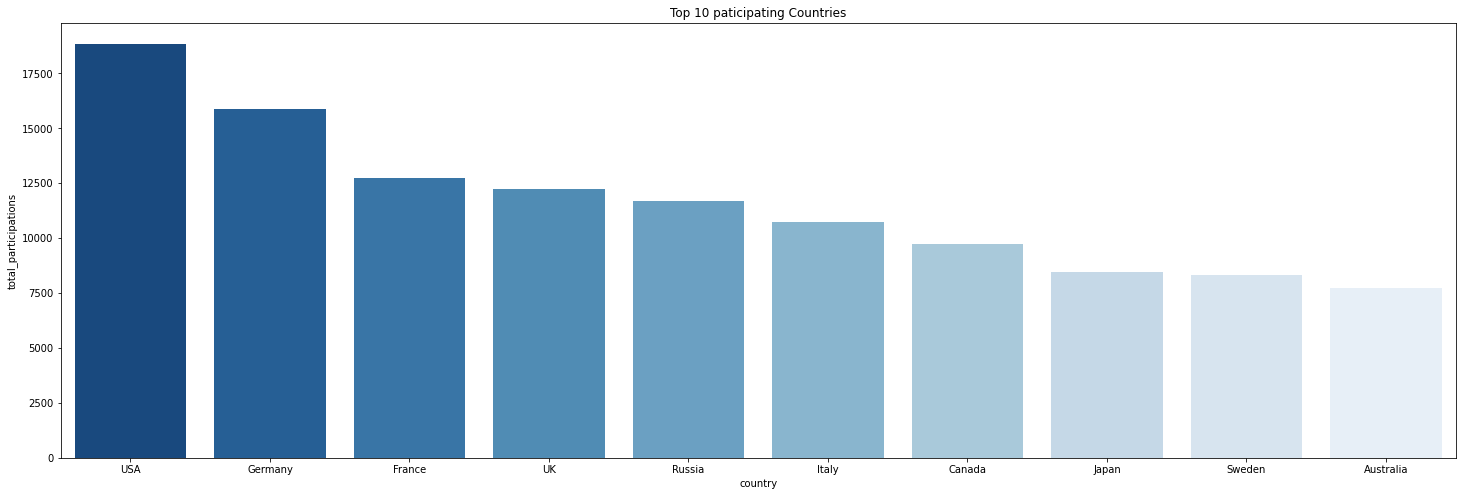

In [145]:
#Top 10 paticipating countries viz
plt.figure(figsize= (25,8))
sbn.barplot(x =top_10['country'], y = top_10['total_participations'], palette = "Blues_r" )
plt.title('Top 10 paticipating Countries')

Text(0.5, 1.0, 'Top 15 paticipating Countries by medals won')

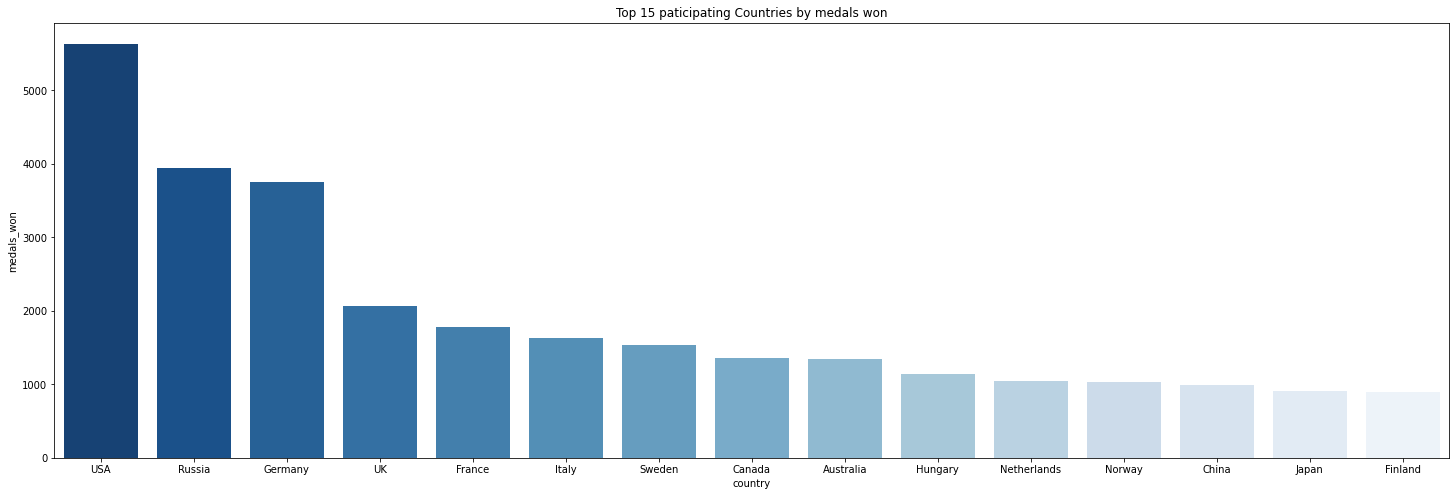

In [146]:
#total medals won by countries
t15 = df.groupby('region').agg({'medal_fl':['count', 'sum']}).reset_index()
t15.columns = ['country','total_paticipations', 'medals_won']
t15 = t15.sort_values('medals_won', ascending = False)[0:15]
plt.figure(figsize= (25,8))
sbn.barplot(x =t15['country'], y = t15['medals_won'], palette = "Blues_r" )
plt.title('Top 15 paticipating Countries by medals won')

<Figure size 864x432 with 0 Axes>

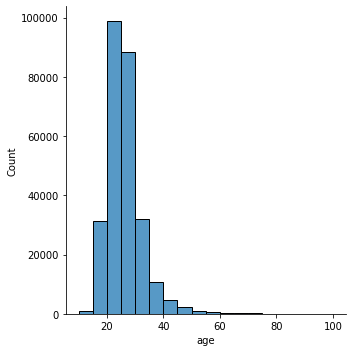

In [122]:
#distribution of athletes across age
plt.figure(figsize=(12,6))
sbn.displot(df, x="age", binwidth=5, bins = 10)

In [128]:
#see paticipation by gender
paticipation_by_gender = df.sex.value_counts()
paticipation_by_gender

M    196594
F     74522
Name: sex, dtype: int64

percentage of paticipating gender

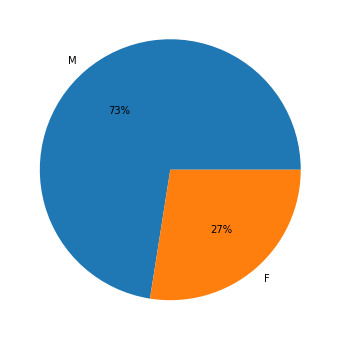

In [136]:
plt.figure(figsize=(8,6))
plt.pie(paticipation_by_gender, labels = paticipation_by_gender.index, autopct='%.0f%%')
plt.show()

In [138]:
df.head()

,id,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,region,notes,medal_fl
0,1,A Dijiang,M,24.00,180.00,80.00,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0,China,NaN,0
1,2,A Lamusi,M,23.00,170.00,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0,China,NaN,0
2,3,Gunnar Nielsen Aaby,M,24.00,175.34,70.70,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0,Denmark,NaN,0
3,4,Edgar Lindenau Aabye,M,34.00,175.34,70.70,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,1
4,5,Christine Jacoba Aaftink,F,21.00,185.00,82.00,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0,Netherlands,NaN,0


How Many medals were won each year?

Text(0.5, 1.0, 'Trend of medals won')

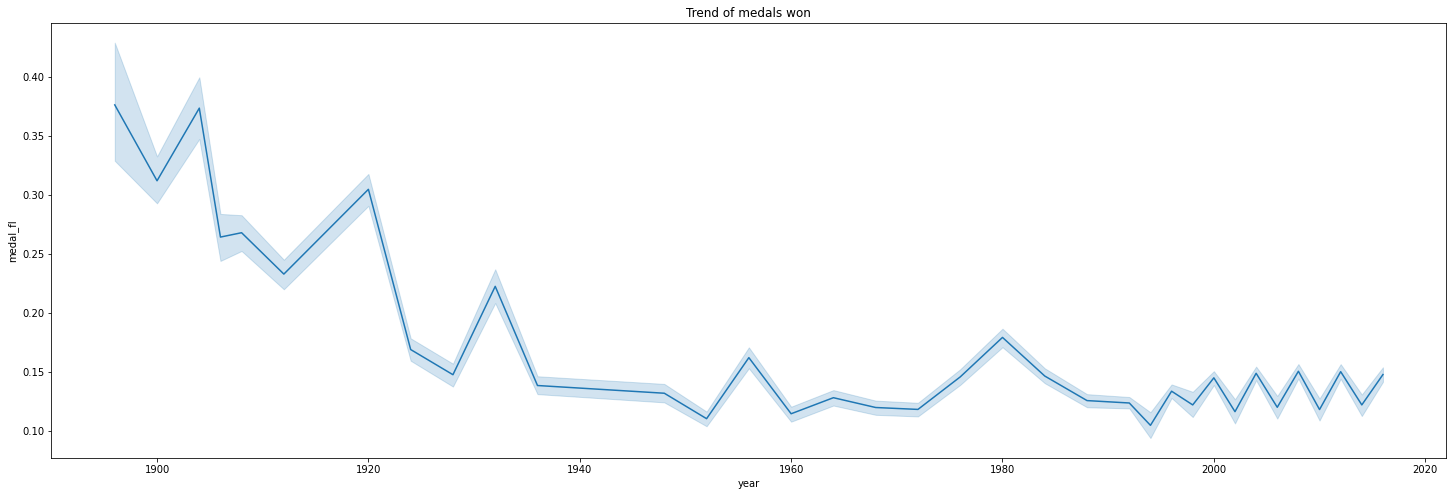

In [140]:
plt.figure(figsize = (25,8))
sbn.lineplot(x=df['year'], y=df['medal_fl'])
plt.title('Trend of medals won')